In [24]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv('hw5_treasury yield curve data.csv')
df = df.drop(['Date'],axis=1)
columns=df.columns[0:31]
#Delete the missing data
df=df.dropna()
#Read and Summarize Data
print("Shape:"+ str(df.shape))
row=df.shape[0]
column=df.shape[1]
print(df.head())
summary = df.describe()
print(summary)

Shape:(8071, 31)
   SVENF01  SVENF02  SVENF03  SVENF04  SVENF05  SVENF06  SVENF07  SVENF08  \
0   2.1224   2.0266   2.1023   2.2377   2.3790   2.5042   2.6069   2.6885   
1   2.1239   2.0317   2.1096   2.2468   2.3901   2.5171   2.6217   2.7049   
2   2.0874   1.9956   2.0844   2.2289   2.3736   2.4980   2.5984   2.6779   
3   2.1319   2.0559   2.1451   2.2856   2.4257   2.5461   2.6428   2.7188   
4   2.1051   2.0234   2.1180   2.2632   2.4051   2.5248   2.6198   2.6940   

   SVENF09  SVENF10  ...  SVENF22  SVENF23  SVENF24  SVENF25  SVENF26  \
0   2.7530   2.8054  ...   3.3355   3.3876   3.4400   3.4925   3.5446   
1   2.7710   2.8247  ...   3.3574   3.4091   3.4610   3.5130   3.5646   
2   2.7418   2.7951  ...   3.3589   3.4086   3.4575   3.5055   3.5524   
3   2.7791   2.8289  ...   3.3940   3.4485   3.5029   3.5568   3.6099   
4   2.7532   2.8029  ...   3.3712   3.4227   3.4735   3.5234   3.5722   

   SVENF27  SVENF28  SVENF29  SVENF30  Adj_Close  
0   3.5962   3.6471   3.6970  

# Part 1 EDA

Pair Plot, Heat Map

<Figure size 432x288 with 0 Axes>

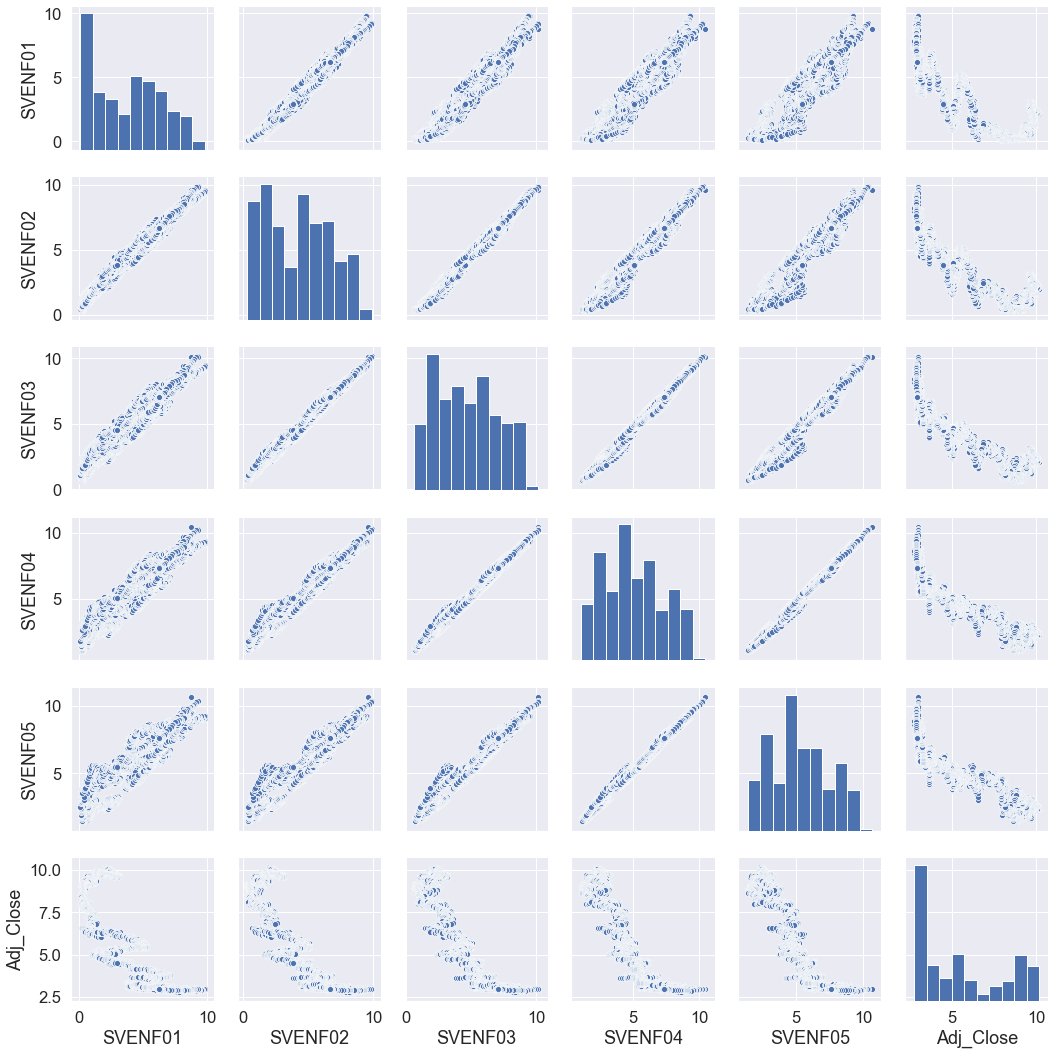

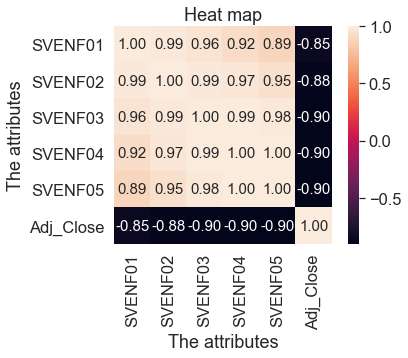

In [15]:
cols=['SVENF01','SVENF02','SVENF03','SVENF04','SVENF05','Adj_Close']
plt.figure()
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.ylabel('The attributes')
plt.xlabel('The attributes')
plt.title('Heat map')
plt.show()


# Part 2 Perform a PCA on the dataset 

Explained variance ratio:  [9.25027254e-01 3.77198563e-02 3.11962115e-02 5.11829721e-03
 8.45006479e-04 8.14071111e-05 1.06386900e-05 1.23073879e-06
 8.99497477e-08 7.14094977e-09 4.89071592e-10 3.83422436e-11
 8.63162713e-12 7.54060102e-12 7.44722038e-12 7.41409677e-12
 7.37633844e-12 7.36922042e-12 7.21033060e-12 7.16011018e-12
 7.08499808e-12 7.01615861e-12 6.97953948e-12 6.83297854e-12
 6.78790385e-12 6.76011093e-12 6.68796631e-12 6.63106214e-12
 6.57322725e-12 6.42225375e-12]
Explained variance:  [1.07902835e+02 4.39995625e+00 3.63898432e+00 5.97040551e-01
 9.85685500e-02 9.49599926e-03 1.24098486e-03 1.43563560e-04
 1.04924831e-05 8.32979488e-07 5.70493586e-08 4.47255665e-09
 1.00686443e-09 8.79598117e-10 8.68705426e-10 8.64841615e-10
 8.60437170e-10 8.59606866e-10 8.41072642e-10 8.35214516e-10
 8.26452819e-10 8.18422814e-10 8.14151256e-10 7.97055174e-10
 7.91797289e-10 7.88555294e-10 7.80139748e-10 7.73501973e-10
 7.66755634e-10 7.49144835e-10]


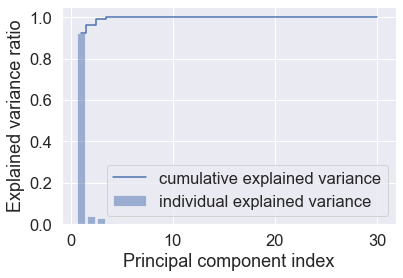

Explained variance ratio of the 3-component version:  [0.92502725 0.03771986 0.03119621]
Explained variance of the 3-component version:  [107.90283548   4.39995625   3.63898432]
Cumulative explained variance ratio of the 3-component version:  0.9936054704751928
Cumulative explained variance of the 3-component version:  115.94177605261852


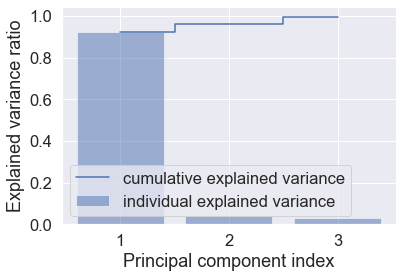

In [17]:
#split data
from sklearn.model_selection import train_test_split
X=df.drop('Adj_Close',axis=1).values
y=df['Adj_Close'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

#PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
cov_mat = np.cov(X_test.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
print('Explained variance ratio: ', pca.explained_variance_ratio_)
print('Explained variance: ', pca.explained_variance_)
cum_var_exp = np.cumsum(var_exp)
plt.figure()
plt.bar(range(1,31),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,31),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()
pca = PCA(n_components=3)
pca.fit(X)
cov_mat = np.cov(X_test.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
print('Explained variance ratio of the 3-component version: ', pca.explained_variance_ratio_)
print('Explained variance of the 3-component version: ', pca.explained_variance_)
cum_var_exp = np.cumsum(var_exp)
cum_var=np.cumsum(pca.explained_variance_)
print('Cumulative explained variance ratio of the 3-component version: ', cum_var_exp[2])
print('Cumulative explained variance of the 3-component version: ', cum_var[2])
plt.figure()
plt.bar(range(1,4),var_exp[0:3],alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,4),cum_var_exp[0:3],where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

X_pca = pca.transform(X)
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.15,random_state=42)

#set function of CV accuracy score
from sklearn.model_selection import *
from sklearn.metrics import mean_squared_error
def train_and_evaluate(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    print("Accuracy R2 score on training set:",clf.score(X_train, y_train))
    print("Accuracy R2 score on testing set:", clf.score(X_test, y_test))
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(5, shuffle=True, random_state=33)
    scores_train = cross_val_score(clf, X_train, y_train, cv=cv)
    scores_test = cross_val_score(clf, X_test, y_test, cv=cv)
    print("Average accuracy R2 score on training set using 5-fold cross-validation:",np.mean(scores_train))
    print("Average accuracy R2 score on testing set using 5-fold cross-validation:",np.mean(scores_test))

# Part 3: Linear regression v. SVM regressor - baseline

Accuracy R2 score on training set: 0.8673885521430046
Accuracy R2 score on testing set: 0.8663783970490899
Average accuracy R2 score on training set using 5-fold cross-validation: 0.8669518367262727
Average accuracy R2 score on testing set using 5-fold cross-validation: 0.8649701882097635
Root Mean Squared Error of Train Set: 0.904712305616479
Root Mean Squared Error of Test Set: 0.9236577822901371
Slope:
[-0.2175607  -0.24624459  0.01563734]
Intercept: 5.510


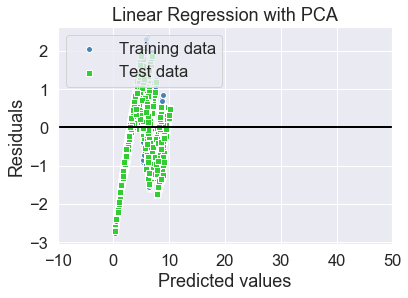

In [19]:
#Linear Regression with PCA
from sklearn.linear_model import LinearRegression
clf_sgd_pca = LinearRegression()
clf_sgd_pca.fit(X_train_pca,y_train_pca)
print("Accuracy R2 score on training set:",clf_sgd_pca.score(X_train_pca, y_train_pca))
print("Accuracy R2 score on testing set:", clf_sgd_pca.score(X_test_pca, y_test_pca))
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(5, shuffle=True, random_state=33)
scores_train1 = cross_val_score(clf_sgd_pca, X_train_pca, y_train_pca, cv=cv)
scores_test1 = cross_val_score(clf_sgd_pca, X_test_pca, y_test_pca, cv=cv)
print("Average accuracy R2 score on training set using 5-fold cross-validation:",np.mean(scores_train1))
print("Average accuracy R2 score on testing set using 5-fold cross-validation:",np.mean(scores_test1))
y_train_pred_pca1 = clf_sgd_pca.predict(X_train_pca)
y_test_pred_pca1 = clf_sgd_pca.predict(X_test_pca)
rmse_li_pca1 = np.sqrt(mean_squared_error(y_train_pca,y_train_pred_pca1))
print("Root Mean Squared Error of Train Set: {}".format(rmse_li_pca1))
rmse_li_pca2 = np.sqrt(mean_squared_error(y_test_pca,y_test_pred_pca1))
print("Root Mean Squared Error of Test Set: {}".format(rmse_li_pca2))
print('Slope:')
print(clf_sgd_pca.coef_)
print('Intercept: %.3f' % clf_sgd_pca.intercept_)
plt.figure()
plt.scatter(y_train_pred_pca1, y_train_pred_pca1 - y_train_pca, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred_pca1, y_test_pred_pca1 - y_test_pca, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Linear Regression with PCA')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

Accuracy R2 score on training set: 0.902273035340047
Accuracy R2 score on testing set: 0.9041309535336549
Average accuracy R2 score on training set using 5-fold cross-validation: 0.9010357624460493
Average accuracy R2 score on testing set using 5-fold cross-validation: 0.8999735972646509
Root Mean Squared Error of Train Set: 0.7766533040369735
Root Mean Squared Error of Test Set: 0.7823695855060474
Slope:
[  -4.83843828   53.15886154 -249.77609515  590.39765971 -686.96356431
  228.0988777   289.2937007  -302.62642323  -44.31624559  320.69207748
 -288.36927381  200.16366115   -0.89256855  -86.9401334   -96.64031266
   -7.50513023 -302.47703103  216.50764237  136.90241245  133.63875552
  562.97736488 -387.63320903  176.17955175 -418.55197044 -795.41172645
  238.76730552  102.69781344  839.17533861  -80.32795402 -336.50681657]
Intercept: 11.807


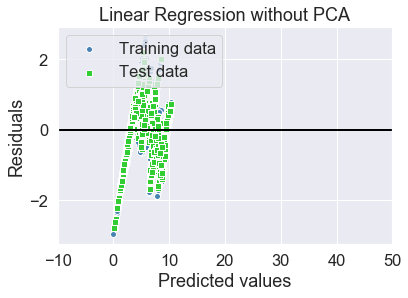

In [25]:
#Linear Regression without PCA
from sklearn.linear_model import LinearRegression
clf_sgd = LinearRegression()
train_and_evaluate(clf_sgd,X_train,y_train)
y_train_pred1 = clf_sgd.predict(X_train)
y_test_pred1 = clf_sgd.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred1))
print("Root Mean Squared Error of Train Set: {}".format(rmse))
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred1))
print("Root Mean Squared Error of Test Set: {}".format(rmse))
print('Slope:')
print(clf_sgd.coef_)
print('Intercept: %.3f' % clf_sgd.intercept_)
plt.figure()
plt.scatter(y_train_pred1, y_train_pred1 - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred1, y_test_pred1 - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Linear Regression without PCA')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

Accuracy R2 score on training set: 0.862474715647968
Accuracy R2 score on testing set: 0.861200101329351
Average accuracy R2 score on training set using 5-fold cross-validation: 0.8620007532865479
Average accuracy R2 score on testing set using 5-fold cross-validation: 0.8584660640630503
Root Mean Squared Error of Train Set: 0.9213216250114565
Root Mean Squared Error of Test Set: 0.9413851205562509
Slope:
[[-0.22866107 -0.29654861  0.03560012]]
Intercept: 5.442


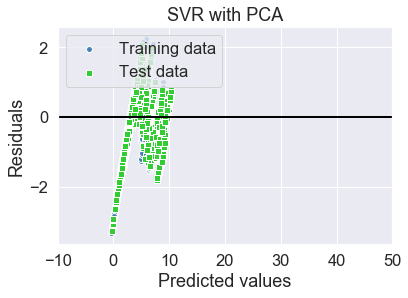

In [20]:
from sklearn import svm
#SVM with PCA
clf_svr_pca = svm.SVR(kernel='linear')
clf_svr_pca.fit(X_train_pca,y_train_pca)
print("Accuracy R2 score on training set:",clf_svr_pca.score(X_train_pca, y_train_pca))
print("Accuracy R2 score on testing set:", clf_svr_pca.score(X_test_pca, y_test_pca))
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(5, shuffle=True, random_state=33)
scores_train2 = cross_val_score(clf_svr_pca, X_train_pca, y_train_pca, cv=cv)
scores_test2 = cross_val_score(clf_svr_pca, X_test_pca, y_test_pca, cv=cv)
print("Average accuracy R2 score on training set using 5-fold cross-validation:",np.mean(scores_train2))
print("Average accuracy R2 score on testing set using 5-fold cross-validation:",np.mean(scores_test2))
y_train_pred_pca2 = clf_svr_pca.predict(X_train_pca)
y_test_pred_pca2 = clf_svr_pca.predict(X_test_pca)
rmse_SVM_pca1 = np.sqrt(mean_squared_error(y_train_pca,y_train_pred_pca2))
print("Root Mean Squared Error of Train Set: {}".format(rmse_SVM_pca1))
rmse_SVM_pca2 = np.sqrt(mean_squared_error(y_test_pca,y_test_pred_pca2))
print("Root Mean Squared Error of Test Set: {}".format(rmse_SVM_pca2))
print('Slope:')
print(clf_svr_pca.coef_)
print('Intercept: %.3f' % clf_svr_pca.intercept_)
plt.figure()
plt.scatter(y_train_pred_pca2, y_train_pred_pca2 - y_train_pca, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred_pca2, y_test_pred_pca2 - y_test_pca, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('SVR with PCA')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

Accuracy R2 score on training set: 0.8933230878134524
Accuracy R2 score on testing set: 0.8944429691333482
Average accuracy R2 score on training set using 5-fold cross-validation: 0.8925818002331299
Average accuracy R2 score on testing set using 5-fold cross-validation: 0.8881862799306814
Root Mean Squared Error of Train Set: 0.8114377482436396
Root Mean Squared Error of Test Set: 0.820949302035238
Slope:
[[ 0.28502261  0.17012401 -3.18652086  0.24086713  2.351913    2.18005974
   0.83353371 -0.62989206 -1.6161057  -1.95568616 -1.71667616 -1.07577227
  -0.26184565  0.53300508  1.15724106  1.52993139  1.60312998  1.4044737
   0.97230776  0.38588103 -0.26667849 -0.90004092 -1.41725446 -1.75247579
  -1.82352097 -1.57814458 -0.9889056  -0.01337928  1.34245905  3.09584137]]
Intercept: 11.712


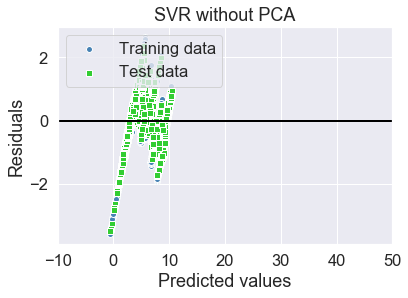

In [26]:
#SVM without PCA
from sklearn import svm
clf_svr = svm.SVR(kernel='linear')
train_and_evaluate(clf_svr, X_train, y_train)
y_train_pred2 = clf_svr.predict(X_train)
y_test_pred2 = clf_svr.predict(X_test)
rmse_SVM1 = np.sqrt(mean_squared_error(y_train,y_train_pred2))
print("Root Mean Squared Error of Train Set: {}".format(rmse_SVM1))
rmse_SVM2 = np.sqrt(mean_squared_error(y_test,y_test_pred2))
print("Root Mean Squared Error of Test Set: {}".format(rmse_SVM2))
print('Slope:')
print(clf_svr.coef_)
print('Intercept: %.3f' % clf_svr.intercept_)
plt.figure()
plt.scatter(y_train_pred2, y_train_pred2 - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred2, y_test_pred2 - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('SVR without PCA')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [21]:
print("My name is Zhiyi Ye")
print("My NetID is: zhiyiye2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhiyi Ye
My NetID is: zhiyiye2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
